In [2]:
#Author Alex J. Yang, alexjieyang@outlook.com

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
from collections import Counter
import scipy.stats
import seaborn as sns
import networkx as nx

# construct network

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)

In [4]:
f1 = f1[['citing_doi', 'cited_doi']]
f1['citing_id'] = f1['citing_doi'].map(dict(zip(f2['id'],f2.index)))
f1['cited_id'] =  f1['cited_doi'].map(dict(zip(f2['id'],f2.index)))
f11 = f1[['cited_id','citing_id']].copy()
f11 = f11[f11.columns[::-1]]

In [5]:
g = ig.Graph.DataFrame(f11, directed=True)

In [6]:
n = g.to_networkx()

# METAandDIO

In [7]:
ff = f2.fillna(0)
ff

,id,journal,meta,year,closeness,betweenness,authority,hub,eigenvector,indegree,h,coreness,pagerank,DI,CD,2stepD,D,degree
0,10.1103/PhysRev.1.1,Physical Review,Physical Review1913,1913,0.666667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1,1,1.105597e-06,0.000000,1.000000,1.000000,1.000000,1
1,10.1103/PhysRev.1.124,Physical Review,Physical Review1913,1913,0.159071,0.000000e+00,9.791660e-10,0.000000e+00,1.116076e-04,5,2,4,1.797312e-06,0.000000,1.000000,1.000000,1.000000,5
2,10.1103/PhysRev.1.141,Physical Review,Physical Review1913,1913,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,4.297752e-07,0.000000,0.000000,0.000000,0.000000,0
3,10.1103/PhysRev.1.154,Physical Review,Physical Review1913,1913,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,4.297752e-07,0.000000,0.000000,0.000000,0.000000,0
4,10.1103/PhysRev.1.16,Physical Review,Physical Review1913,1913,0.157664,0.000000e+00,9.578776e-10,0.000000e+00,1.744267e-04,4,1,3,2.372948e-06,0.000000,1.000000,1.000000,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463343,10.1103/RevModPhys.9.391,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.199643,1.419043e+07,1.798345e-06,9.445422e-05,1.994768e-03,10,7,11,9.391861e-06,-0.047244,-0.047244,0.006154,0.015748,19
463344,10.1103/RevModPhys.9.403,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.131657,0.000000e+00,0.000000e+00,2.608461e-11,0.000000e+00,0,0,2,4.297752e-07,0.000000,0.000000,0.000000,0.000000,2
463345,10.1103/RevModPhys.9.432,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.222096,1.784951e+06,2.378447e-04,3.176395e-06,4.156065e-06,50,12,13,9.709074e-06,0.159420,0.159420,0.039454,0.170290,56
463346,10.1103/RevModPhys.9.44,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.165863,3.392220e+06,8.589673e-12,1.509779e-07,2.294053e-09,4,2,5,2.722739e-06,-0.030769,-0.030769,0.013699,0.015385,24


In [12]:
ff1 = ff[ff['degree']>=500]

In [13]:
ff1

,id,journal,meta,year,closeness,betweenness,authority,hub,eigenvector,indegree,h,coreness,pagerank,DI,CD,2stepD,D,degree
361,10.1103/PhysRev.100.545,Physical Review,Physical Review1955,1955,0.232239,2.763410e+05,0.003539,0.001867,0.000025,550,56,20,0.000113,-0.109244,-0.109244,0.004121,0.110444,554
362,10.1103/PhysRev.100.564,Physical Review,Physical Review1955,1955,0.232737,4.798862e+05,0.003539,0.001807,0.000036,523,47,20,0.000096,-0.065604,-0.065604,0.007296,0.127529,527
365,10.1103/PhysRev.100.580,Physical Review,Physical Review1955,1955,0.243174,3.109270e+06,0.002185,0.001692,0.001057,518,36,20,0.000076,0.262700,0.262700,0.007713,0.319303,530
388,10.1103/PhysRev.100.675,Physical Review,Physical Review1955,1955,0.245847,4.003366e+06,0.003704,0.001487,0.000079,659,55,20,0.000094,-0.214747,-0.214747,0.002138,0.069968,666
871,10.1103/PhysRev.102.1030,Physical Review,Physical Review1956,1956,0.240854,1.611437e+06,0.002957,0.001059,0.000902,601,47,19,0.000136,0.082055,0.082055,0.007827,0.271472,606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463185,10.1103/RevModPhys.78.17,Reviews of Modern Physics,Reviews of Modern Physics2006,2006,0.252208,5.163111e+07,0.000494,0.011598,0.000000,257,14,21,0.000006,-0.010434,-0.010434,0.002566,0.005509,504
463201,10.1103/RevModPhys.78.865,Reviews of Modern Physics,Reviews of Modern Physics2006,2006,0.264916,4.705630e+07,0.004811,0.647170,0.000000,128,12,21,0.000003,-0.004732,-0.004732,0.000165,0.000291,519
463289,10.1103/RevModPhys.80.885,Reviews of Modern Physics,Reviews of Modern Physics2008,2008,0.265766,3.844831e+07,0.000088,0.014779,0.000000,199,5,21,0.000004,-0.009391,-0.009391,0.000978,0.001037,631
463342,10.1103/RevModPhys.9.245,Reviews of Modern Physics,Reviews of Modern Physics1937,1937,0.232555,2.438107e+08,0.000073,0.000131,0.389637,329,30,14,0.000343,0.055529,0.055529,0.009942,0.107195,541


In [107]:
ff1[['degree' , 'h' , 'pagerank' , 'D' , '2stepD' , 'CD']].describe()

,degree,h,pagerank,D,2stepD,CD
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,881.310680,42.446602,0.000144,0.275480,0.027432,0.178760
std,603.098504,13.801540,0.000163,0.283713,0.137429,0.312066
min,500.000000,5.000000,0.000003,0.000291,0.000165,-0.370643
25%,567.250000,34.250000,0.000050,0.048310,0.003109,-0.021696
50%,686.000000,41.000000,0.000088,0.172215,0.006510,0.046275
75%,925.500000,50.000000,0.000178,0.432704,0.010976,0.361468
max,5474.000000,106.000000,0.001243,1.000000,1.000000,1.000000


In [15]:
n.remove_nodes_from(ff[ff['degree']<500].index)

In [16]:
g = ig.Graph.from_networkx(n)

# DEGREE

In [19]:
n.number_of_nodes()

206

In [20]:
pos = nx.spring_layout(n)

In [108]:
LDIO = ff1['degree'].values
node_labels = dict(zip(ff1.index,ff1['meta'].values))

node_sizes = ig.rescale(LDIO, (100, 1000))
edge_widths = ig.rescale(g.edge_betweenness(), (1, 10))
font_sizes = ig.rescale(LDIO, (.1, 5))

scaled_edge_betweenness = ig.rescale(g.edge_betweenness(), clamp=True)
scaled_vertex_LDIO = ig.rescale(LDIO, clamp=True)

cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["midnightblue","pink", "#8B0000"])
cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

node_colors = [cmap1(DIO) for DIO in scaled_vertex_LDIO]
edge_colors = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]

node_alphas = ig.rescale(g.degree(), (.1, 1))

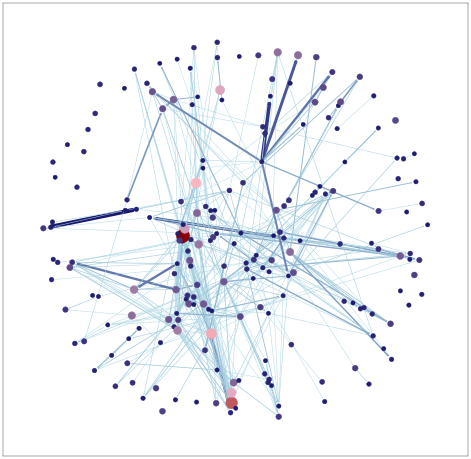

In [109]:
plt.figure(figsize=(20, 20), dpi=30)
nodes = nx.draw_networkx_nodes(n, pos, node_size=node_sizes,node_color=node_colors)
edges = nx.draw_networkx_edges(n,pos,arrowstyle="->",arrowsize= 3,edge_color=edge_colors,width=edge_widths)

# Hindex

In [97]:
Hindex = ff1['h'].values
node_labels = dict(zip(ff1.index,ff1['meta'].values))

node_sizes = ig.rescale(Hindex, (100, 1000))
edge_widths = ig.rescale(g.edge_betweenness(), (1, 10))
font_sizes = ig.rescale(Hindex, (.1, 5))

scaled_edge_betweenness = ig.rescale(g.edge_betweenness(), clamp=True)
scaled_vertex_Hindex = ig.rescale(Hindex, clamp=True)

cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["midnightblue","pink", "#8B0000"])
cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

node_colors = [cmap1(hh) for hh in scaled_vertex_Hindex]
edge_colors = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]

node_alphas = ig.rescale(Hindex, (.1, 1))

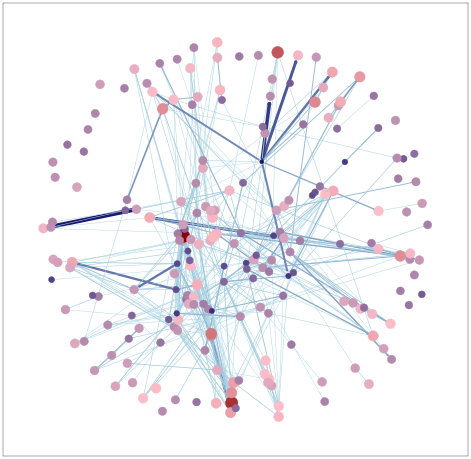

In [98]:
plt.figure(figsize=(20, 20), dpi=30)
nodes = nx.draw_networkx_nodes(n, pos, node_size=node_sizes,node_color=node_colors)
edges = nx.draw_networkx_edges(n,pos,arrowstyle="->",arrowsize= 3,edge_color=edge_colors,width=edge_widths)

# pagerank

In [110]:
LDIO = ff1['pagerank'].values
node_labels = dict(zip(ff1.index,ff1['meta'].values))

node_sizes = ig.rescale(LDIO, (100, 1000))
edge_widths = ig.rescale(g.edge_betweenness(), (1, 10))
font_sizes = ig.rescale(LDIO, (.1, 5))

scaled_edge_betweenness = ig.rescale(g.edge_betweenness(), clamp=True)
scaled_vertex_LDIO = ig.rescale(LDIO, clamp=True)

cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["midnightblue","pink", "#8B0000"])
cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

node_colors = [cmap1(DIO) for DIO in scaled_vertex_LDIO]
edge_colors = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]

node_alphas = ig.rescale(g.degree(), (.1, 1))

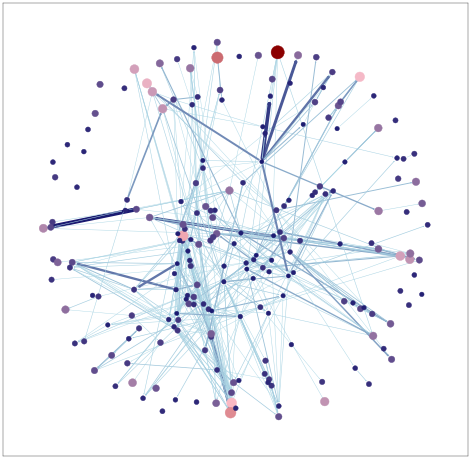

In [111]:
plt.figure(figsize=(20, 20), dpi=30)
nodes = nx.draw_networkx_nodes(n, pos, node_size=node_sizes,node_color=node_colors)
edges = nx.draw_networkx_edges(n,pos,arrowstyle="->",arrowsize= 3,edge_color=edge_colors,width=edge_widths)

# CD

In [105]:
LDIO = ff1['CD'].values
node_labels = dict(zip(ff1.index,ff1['meta'].values))

node_sizes = ig.rescale(LDIO, (100, 1000))
edge_widths = ig.rescale(g.edge_betweenness(), (1, 10))
font_sizes = ig.rescale(LDIO, (.1, 5))

scaled_edge_betweenness = ig.rescale(g.edge_betweenness(), clamp=True)
scaled_vertex_LDIO = ig.rescale(LDIO, clamp=True)

cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["midnightblue","pink", "#8B0000"])
cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

node_colors = [cmap1(DIO) for DIO in scaled_vertex_LDIO]
edge_colors = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]

node_alphas = ig.rescale(g.degree(), (.1, 1))

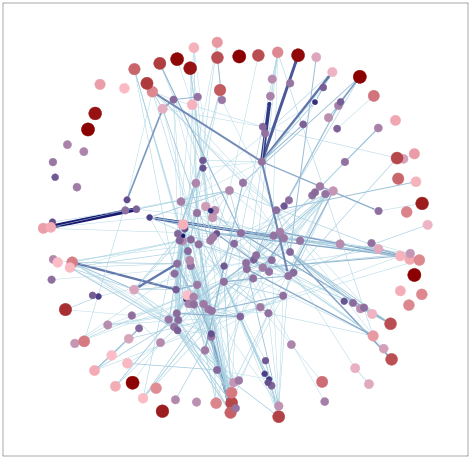

In [106]:
plt.figure(figsize=(20, 20), dpi=30)
nodes = nx.draw_networkx_nodes(n, pos, node_size=node_sizes,node_color=node_colors)
edges = nx.draw_networkx_edges(n,pos,arrowstyle="->",arrowsize= 3,edge_color=edge_colors,width=edge_widths)

# D

In [103]:
LDIO = ff1['D'].values
node_labels = dict(zip(ff1.index,ff1['meta'].values))

node_sizes = ig.rescale(LDIO, (100, 1000))
edge_widths = ig.rescale(g.edge_betweenness(), (1, 10))
font_sizes = ig.rescale(LDIO, (.1, 5))

scaled_edge_betweenness = ig.rescale(g.edge_betweenness(), clamp=True)
scaled_vertex_LDIO = ig.rescale(LDIO, clamp=True)

cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["midnightblue","pink", "#8B0000"])
cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

node_colors = [cmap1(DIO) for DIO in scaled_vertex_LDIO]
edge_colors = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]

node_alphas = ig.rescale(g.degree(), (.1, 1))

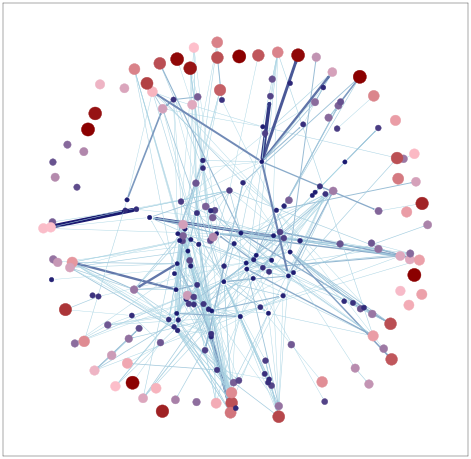

In [104]:
plt.figure(figsize=(20, 20), dpi=30)
nodes = nx.draw_networkx_nodes(n, pos, node_size=node_sizes,node_color=node_colors)
edges = nx.draw_networkx_edges(n,pos,arrowstyle="->",arrowsize= 3,edge_color=edge_colors,width=edge_widths)

# 2D

In [101]:
LDIO = ff1['2stepD'].values
node_labels = dict(zip(ff1.index,ff1['meta'].values))

node_sizes = ig.rescale(LDIO, (100, 1000))
edge_widths = ig.rescale(g.edge_betweenness(), (1, 10))
font_sizes = ig.rescale(LDIO, (.1, 5))

scaled_edge_betweenness = ig.rescale(g.edge_betweenness(), clamp=True)
scaled_vertex_LDIO = ig.rescale(LDIO, clamp=True)

cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["midnightblue","pink", "#8B0000"])
cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

node_colors = [cmap1(DIO) for DIO in scaled_vertex_LDIO]
edge_colors = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]

node_alphas = ig.rescale(g.degree(), (.1, 1))

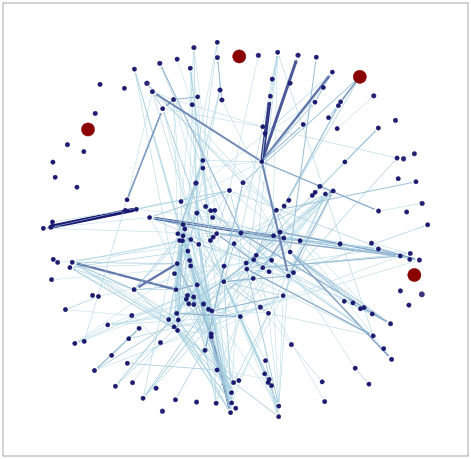

In [102]:
plt.figure(figsize=(20, 20), dpi=30)
nodes = nx.draw_networkx_nodes(n, pos, node_size=node_sizes,node_color=node_colors)
edges = nx.draw_networkx_edges(n,pos,arrowstyle="->",arrowsize= 3,edge_color=edge_colors,width=edge_widths)